In [2]:
import pandas as pd
import numpy as np
import pathlib
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Iterating through a dir to concat all population tables spread across tables each for a specific year 

In [ ]:
def feature_extraction(url):
    df=pd.read_csv(url,header=2,encoding='ISO-8859-1')
    df=df[:2]
    df=df.dropna()
    df.drop('Code',axis=1,inplace=True)
    df.drop(['Persons'],axis=1,inplace=True)
    return df

def concat_tables(path):
    df=pd.DataFrame()
    files=[]
    directory=pathlib.Path(path)
    files=list(directory.glob('**/*'))
    for file in files:
        df2=feature_extraction(file)
        df=pd.concat([df,df2],axis=0)
    return df 

In [ ]:
df=concat_tables('data/population')

In [ ]:
# I exported the file to powerbi to be able to decode the features to integers and then loaded the new Dataframe into pandas 

In [ ]:
df.to_csv('to_be_converted.csv') #load in powerbi and change the type of variable to int then save as new dataset under the name of pop in xlsx form

In [ ]:
df=pd.read_excel('/content/drive/MyDrive/assignment 2 cetm-46/pop.xlsx',header=1)
df['total']=df['Unnamed: 0']
df.drop('Unnamed: 0',axis=1,inplace=True)
time=pd.date_range(start='1981-1-1',periods=40,freq='Y')
df.index=pd.PeriodIndex(pd.Series(time).dt.year,freq='Y')

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,82,83,84,85,86,87,88,89,90,total
1981,68529,66723,64065,59568,59023,64515,65573,67271,72378,77976,...,15848,13647,11778,10157,8229,6795,5579,4339,13571,5180200
1982,66594,68063,66389,63810,59442,58911,64300,65387,66999,72148,...,17295,13930,11934,10173,8634,6863,5547,4459,13709,5164540
1983,65110,66015,67723,66026,63633,59327,58774,64236,65167,66811,...,17656,15411,12186,10391,8719,7320,5703,4482,14193,5148120
1984,63669,64796,65713,67520,65844,63560,59244,58710,64015,65132,...,17954,15793,13640,10583,8952,7397,6137,4646,14557,5138880
1985,65438,63134,64249,65278,67156,65600,63454,59144,58494,63864,...,18555,16069,14023,11979,9111,7659,6221,5055,14998,5127890


In [ ]:
df2=pd.read_csv('/content/drive/MyDrive/assignment 2 cetm-46/data/migration/mig-to-from-scotland-tab1_Net 1951-.csv',encoding='ISO-8859-1',header=5)
df2=df2[['Total1,2,8']]
df2=df2.iloc[29:]
df2=df2.dropna()
time2=pd.date_range(start='1981-1-1',end='2021-1-1',freq='Y')
df2.index=pd.PeriodIndex(pd.Series(time2).dt.year,freq='Y')
df2.columns=[['total_immigration']]
df2=df2*1000

In [ ]:
df2.head()

,total_immigration
1981,-23100.0
1982,-16900.0
1983,-19700.0
1984,-12000.0
1985,-15000.0


In [ ]:
df3=pd.read_excel('/content/drive/MyDrive/assignment 2 cetm-46/data/births/births.xlsx',header=5)
df3.dropna(inplace=True)
df3=df3.iloc[:,1]
df3=df3.tail(40)
time3=pd.date_range(start='1981-1-1',end='2021-1-1',freq='Y')
df3.index=pd.PeriodIndex(pd.Series(time3).dt.year,freq='Y')

In [ ]:
df4=pd.read_excel('/content/drive/MyDrive/assignment 2 cetm-46/data/deaths/deaths.xlsx',header=4,names=['1','2','3','4'])
df4=df4.dropna()
df4=df4.iloc[:,1]
df4=df4.tail(40)
time4=pd.date_range(start='1981-1-1',end='2021-1-1',freq='Y')
df4.index=pd.PeriodIndex(pd.Series(time2).dt.year,freq='Y')

In [ ]:
df4.head()

1981    63828.0
1982    65022.0
1983    63454.0
1984    62345.0
1985    63967.0
Freq: A-DEC, Name: 2, dtype: float64

In [ ]:
df5=pd.concat([df.total,df2,df3,df4],axis=1)
df5['date']=df5.index.map(lambda x: x.start_time)
df5.columns=['population','immigration','births','deaths','date']

In [ ]:
df5.tail()

,population,immigration,births,deaths,date
2016,5404700,31700.0,54488.0,56728.0,2016-01-01
2017,5424800,23900.0,52861.0,57883.0,2017-01-01
2018,5438100,20900.0,51308.0,58503.0,2018-01-01
2019,5463300,30200.0,49863.0,58108.0,2019-01-01
2020,5466000,16900.0,46809.0,64093.0,2020-01-01


In [ ]:
def plot_graph(x,y,x_label=None,y_label=None):
    plt.figure(figsize=(7,5))
    plt.plot(x,y,'r')
    plt.xlabel(x_label)
    plt.ylabel(y_label)

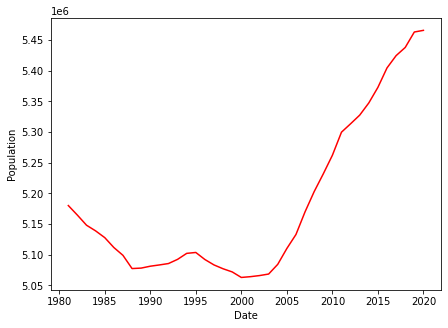

<Figure size 432x288 with 0 Axes>

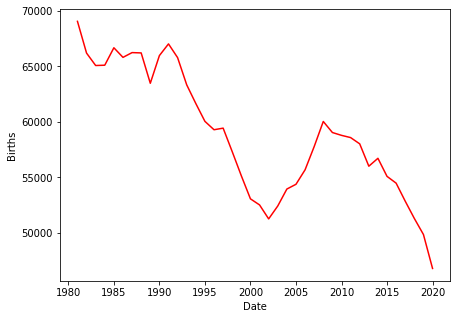

<Figure size 432x288 with 0 Axes>

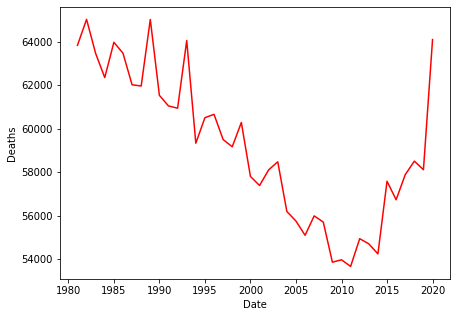

<Figure size 432x288 with 0 Axes>

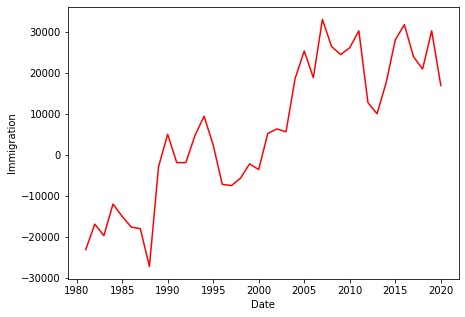

In [ ]:
plot_graph(df5.date,df5.population,'Date','Population')
plt.figure()
plot_graph(df5.date,df5.births,'Date','Births')
plt.figure()
plot_graph(df5.date,df5.deaths,'Date','Deaths')
plt.figure()
plot_graph(df5.date,df5.immigration,'Date','Immigration')

# As we can see the deaths and immigration seems to be a cyclic kind of time-series where the births and population are a random one with downward trend.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# create a normailzed timeseries dataset with timesteps using the original dataset

def create_dataset(dataset,time_step):
    scaler=MinMaxScaler()
    scaled_dataset=scaler.fit_transform(np.array(df5.deaths).reshape(-1,1))
    X,y=[],[]
    for i in range(len(scaled_dataset)-time_step-1):
        a = scaled_dataset[i:(i+time_step)]
        X.append(a)
        y.append(scaled_dataset[i+time_step])
    return np.array(X),np.array(y),scaler

In [ ]:
n_steps_death=3
n_step_birth=2
n_steps_imm=4

data_death,target_death,scaler_death=create_dataset(df5.deaths,n_steps_death)
data_birth,target_birth,scaler_birth=create_dataset(df5.births,n_step_birth)
data_imm,target_imm,scaler_imm=create_dataset(df5.immigration,n_steps_imm)

### train test split was used to cover several samples across the data to learn the different trends so we used a random state to choosing the samples and we could use random sampling since we already created our timeseries data with overlapping points before applying the train_test_split

In [ ]:
X_train_death,X_test_death,y_train_death,y_test_death=train_test_split(data_death,target_death,test_size=0.3,random_state=1)
X_train_birth,X_test_birth,y_train_birth,y_test_birth=train_test_split(data_birth,target_birth,test_size=0.3,random_state=1)
X_train_imm,X_test_imm,y_train_imm,y_test_imm=train_test_split(data_imm,target_imm,test_size=0.3,random_state=1)

### 2 seperate models were created by using several trials and obtaining the best configuration for each dataset to give the best evaluation results using the Root Mean Square Eroor

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import regularizers

In [ ]:
# creating LSTM RNN model for birth and death
def create_model_1(input_shape):
    model=keras.Sequential([
        keras.layers.LSTM(5,return_sequences=True,input_shape=input_shape,activation='relu'),
        keras.layers.LSTM(5),
        keras.layers.Dense(16,activation='linear',kernel_regularizer=regularizers.l2(0.001)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam',loss='mse',metrics=['mae'])
    return model

# create LSTM RNN model for immigration

def create_model_2(input_shape):
    model=keras.Sequential([
        keras.layers.LSTM(10,return_sequences=True,input_shape=input_shape,activation='relu'),
        keras.layers.LSTM(10),
        keras.layers.Flatten(),
        keras.layers.Dense(32,activation='linear',kernel_regularizer=regularizers.l2(0.001)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(16,activation='linear',kernel_regularizer=regularizers.l2(0.001)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1)
    ])
    model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
    return model

In [ ]:
model_death=create_model_1((n_steps_death,1))
history_death=model_death.fit(X_train_death,y_train_death,epochs=300,batch_size=6,verbose=0)

In [ ]:
model_birth=create_model_1((n_step_birth,1))
history_birth=model_birth.fit(X_train_birth,y_train_birth,epochs=300,batch_size=3,verbose=0)

In [ ]:
model_imm=create_model_2((n_steps_imm,1))
history_imm=model_imm.fit(X_train_imm,y_train_imm,epochs=150,batch_size=10,verbose=0)

### Model is evaluated using the Root Mean Square Error against the test data

In [ ]:
import math
from sklearn.metrics import mean_squared_error

In [ ]:
# evaluating the model   
def evaluate_RMSE(model,X_train,X_test,y_train,y_test):
    train_predict=model.predict(X_train)
    test_predict=model.predict(X_test)
    
    train_RMSE=math.sqrt(mean_squared_error(y_train,train_predict))
    test_RMSE=math.sqrt(mean_squared_error(y_test,test_predict))
    return train_RMSE,test_RMSE

In [ ]:
train_evaluate_death,test_evaluate_death=evaluate_RMSE(model_death,X_train_death,X_test_death,y_train_death,y_test_death)
train_evaluate_death,test_evaluate_death

(0.1478719149627954, 0.12118733100493781)

In [ ]:
train_evaluate_birth,test_evaluate_birth=evaluate_RMSE(model_birth,X_train_birth,X_test_birth,y_train_birth,y_test_birth)
train_evaluate_birth,test_evaluate_birth

(0.1327470527173954, 0.12601702613666146)

In [ ]:
train_evaluate_imm,test_evaluate_imm=evaluate_RMSE(model_imm,X_train_imm,X_test_imm,y_train_imm,y_test_imm)
train_evaluate_imm,test_evaluate_imm

(0.1132085023415449, 0.11244063423482613)

### Forecasting over 5 years and plotting the results

In [ ]:
# predicting over 3 years in future
def predict_over_n_years(model,dataset,years,n_steps):
    scaler=MinMaxScaler()
    dataset=scaler.fit_transform(np.array(dataset).reshape(-1,1))
    x_input=np.array(dataset[-n_steps:]).reshape(1,-1)
    temp_input=list(x_input)
    temp_input=temp_input[0].tolist()
    lst_output=[]
    n_steps=n_steps
    i=0
    while (i<years):

        if len(temp_input)>n_steps:
            x_input=np.array(temp_input[1:])
#             print("{} year input is {}".format(i,x_input))
            x_input=x_input.reshape(1,-1)
            x_input=x_input.reshape(1,n_steps,1)
            yhat=model.predict(x_input,verbose=0)
#             print("{} year output is {}".format(i,yhat))
            temp_input.extend(yhat[0].tolist())
            temp_input=temp_input[1:]
            lst_output.extend(yhat.tolist())
            i+=1
        else:
            x_input=x_input.reshape(1,n_steps,1)
            yhat=model.predict(x_input,verbose=0)
#             print(f'0 outpus is {yhat[0]}')
            temp_input.extend(yhat[0].tolist())
            lst_output.extend(yhat.tolist())
            i+=1
    return lst_output,scaler

# plotting our graph as continous by merging the predicted result along with the original one
def plot_graph_predicted(feature,output,scaler,scale=1):
    plt.figure()
    df=df5[feature]
    time=pd.date_range(start='1981-1-1',periods=(len(df)+len(output)),freq='y')
    time=pd.Series(time).dt.year
    my_list=df.tolist()
    my_list.extend(scaler.inverse_transform(output))
    my_list=np.array(my_list)/scale
    plt.plot(time,my_list)
    plt.xlabel(f'date range from 1981 to {time.iloc[-1]} ')
    plt.ylabel(f"{feature} in '{scale} person'")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


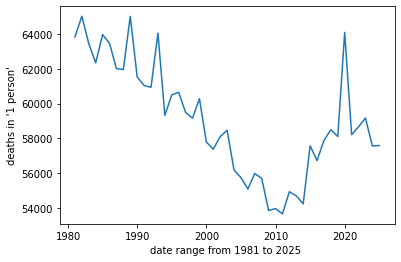

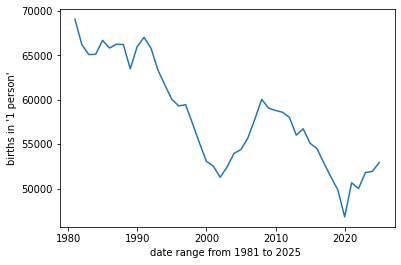

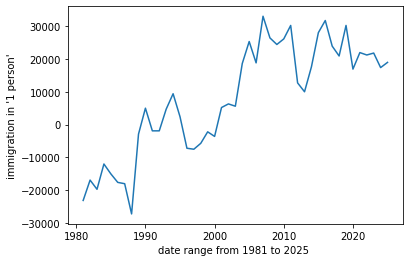

In [ ]:
output_death,scaler_death=predict_over_n_years(model_death,df5.deaths,5,n_steps_death)
plot_graph_predicted('deaths',output_death,scaler_death)

output_birth,scaler_birth=predict_over_n_years(model_birth,df5.births,5,n_step_birth)
plot_graph_predicted('births',output_birth,scaler_birth)

output_imm,scaler_imm=predict_over_n_years(model_imm,df5.immigration,5,n_steps_imm)
plot_graph_predicted('immigration',output_imm,scaler_imm)


### Concatenate all the forecasted and the original results in a new DataFrame

In [ ]:
def create_pandas_series(feature,output,scaler):
    feature=str(feature).lower()
    df=df5[feature]
    my_list=df.tolist()
    my_list.extend(scaler.inverse_transform(output))
    my_list=np.array(my_list)
    my_list=np.array(my_list).astype(int)
    df=pd.Series(my_list)
    return df

In [ ]:
deaths=create_pandas_series('deaths',output_death,scaler_death)
births=create_pandas_series('births',output_birth,scaler_birth)
immigration=create_pandas_series('immigration',output_imm,scaler_imm)
df_final=pd.concat([deaths,births,immigration],axis=1)
df_final.columns=['deaths','births','immigration']
time_final=pd.date_range(start='1981-1-1',periods=45,freq='y')
df_final.index=pd.PeriodIndex(time_final)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


In [ ]:
df_final

,deaths,births,immigration
1981,63828,69054,-23100
1982,65022,66196,-16900
1983,63454,65078,-19700
1984,62345,65106,-12000
1985,63967,66676,-15000
1986,63467,65812,-17600
1987,62014,66241,-18000
1988,61957,66212,-27200
1989,65017,63480,-2900
1990,61527,65973,5000


### population is summation of births,earlier population and immigration with subtraction of deaths so it will be calculated and not forcasted


In [ ]:
df_final['Population']=df5.population
df_final['past_population']=df_final.Population.shift(1)
for i in range(40,45):
    df_final.Population.iloc[i]=df_final.immigration.iloc[i]+df_final.births.iloc[i]-df_final.deaths.iloc[i]+df_final.past_population.iloc[i]
    df_final['past_population']=df_final.Population.shift(1)
df_final.drop('past_population',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
df_final

,deaths,births,immigration,Population
1981,63828,69054,-23100,5180200.0
1982,65022,66196,-16900,5164540.0
1983,63454,65078,-19700,5148120.0
1984,62345,65106,-12000,5138880.0
1985,63967,66676,-15000,5127890.0
1986,63467,65812,-17600,5111760.0
1987,62014,66241,-18000,5099020.0
1988,61957,66212,-27200,5077440.0
1989,65017,63480,-2900,5078190.0
1990,61527,65973,5000,5081270.0


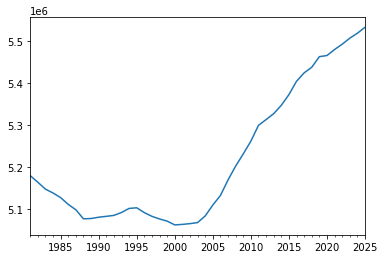

In [ ]:
df_final.Population.plot()

# Save the file to csv file in order to load into powerbi and make an interactive dashboard


In [ ]:
df_final.to_csv('final_dataset.csv')